# <center>Salary Prediction</center>

### <div style="text-align: right"> ~ Akshat Saxena </div>

<b>Problem on Hand: </b> Given a data set which  captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014. Predict the Salaries for Employees in Baltimore</b>

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### Importing the data set

In [2]:
salary_org = pd.read_csv(r"E:\train.csv")
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [3]:
salary_org.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


### Data Cleaning and Preparation

In [4]:
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


>- There are 18981 rows in the data set
>- There are 7 columns in the data set provided
>- All the columns are of type Object.

In [5]:
salary_cpy = salary_org.copy()

In [6]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
salary_cpy.columns = salary_cpy.columns.str.strip() #removing gaps
print("After Removing leading and trailing spaces ",  salary_cpy.columns)

After Removing leading and trailing spaces  Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


In [8]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

- There are null values in HireDate and GrossPay Columns.
- There are 70 null values in HireDate which is less than 1% of values so dropping those rows.

In [9]:
salary_cpy = salary_cpy.dropna(subset=['HireDate'])
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

- Gross Pay is dependent on Annual salary. So these two are interrelated and only one of this can be used as dependent variable. As we have null values in GrossPay so I am dropping that column.

In [10]:
salary_cpy = salary_cpy.drop('GrossPay', axis = 1)

In [11]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [12]:
#Now I will check value counts for all columns
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02339      1
W02584      1
W02658      1
A65MIL      1
W02672      1
Name: AgencyID, Length: 1177, dtype: int64

- There are 1177 agencies in Blatimore. AgencyID represents an Agency, so we should have same number of Agencies as well. So I will verify this logic.

In [13]:
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

- Against my expectations, A single Agency seems to have different Agency ID's which might be given based on Job Role and Agency. So I will verify it.

In [14]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
DATABASE SPECIALIST                  1
EDP DATA TECHNICIAN SUPERVISOR       1
MEDIA PRODUCER DIRECTOR II           1
Fire Captain OEM ALS                 1
Library, IT Training Supv            1
Name: JobTitle, Length: 1073, dtype: int64

- Here I can see that there are 1073 Job title that are available. 

In [15]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
06/15/1997       1
06/18/1985       1
06/05/1972       1
12/05/1995       1
06/14/2010       1
Name: HireDate, Length: 4737, dtype: int64

- Here I can see that the maximum number of people were selected on 05/21/2014.

In [16]:
salary_cpy.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$33311.00       1
$49187.00       1
$25452.00       1
$42000.00       1
$56800.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

- Annual Salary has a dollar attached to it. So I will remove it and convert it into float format.

In [17]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [18]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
26774.0       1
81120.0       1
44000.0       1
58041.0       1
83370.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

<b>Now, I will break the date into Day, Month, and Year.</b>

In [19]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

In [20]:
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [21]:
salary_cpy.HireDay.value_counts(sort = True)

21    1982
10    1189
12    1017
7      862
29     784
13     744
19     680
23     636
1      621
18     603
3      595
11     568
20     565
22     529
4      512
16     506
28     505
15     505
6      488
17     469
30     465
5      464
27     448
25     443
2      432
9      431
26     421
8      418
24     417
14     366
31     246
Name: HireDay, dtype: int64

In [22]:
#I can see there are spaces, so I will trim these spaces.
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

- It can also be seen that some of the job titles are in Upper case. With Lower it might effect analysis, So I will convert all of them to uppercase.

In [23]:
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

<b>Now, I am creating a Box plot for Annual Salary and check for Outliers</b>

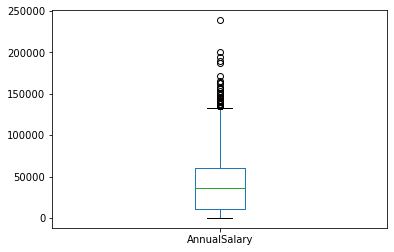

In [24]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [25]:
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

- With the box plot and Described data I can see that the max value is way more than mean, median.
- So I will delete all rows whose annual salary>1500000 according to box plot.

In [26]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]

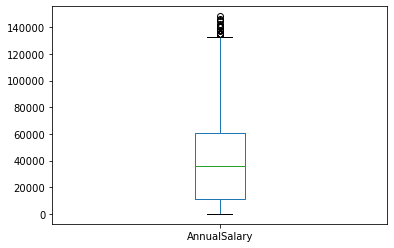

In [27]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

- All the data points above the 75% line are very close to each other so I will leave it.

### Exploratory Data Analysis

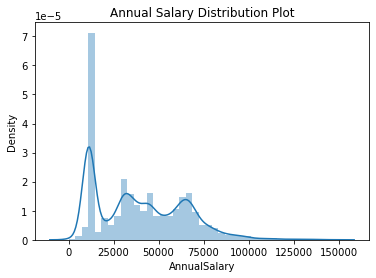

In [28]:
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=12)
plt.show()

- The data is distributed very randomly and there seems to be not many people with salary > 100000.

**Now let us see the Top 10 Hiring Jobs**

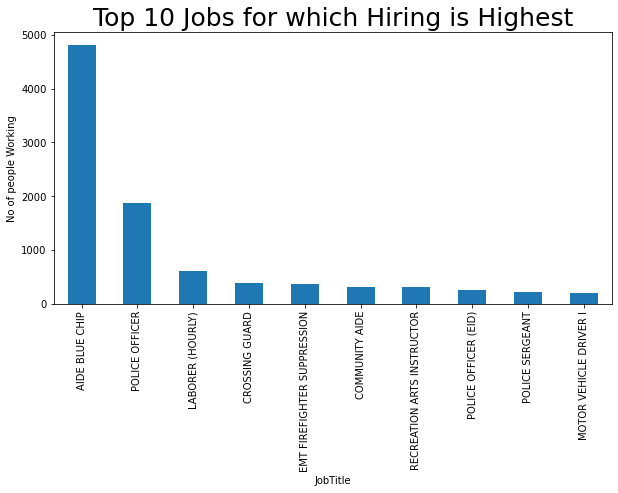

JobTitle
AIDE BLUE CHIP                 4817
POLICE OFFICER                 1866
LABORER (HOURLY)                597
CROSSING GUARD                  374
EMT FIREFIGHTER SUPPRESSION     358
COMMUNITY AIDE                  302
RECREATION ARTS INSTRUCTOR      299
POLICE OFFICER (EID)            250
POLICE SERGEANT                 222
MOTOR VEHICLE DRIVER I          189
Name: Name, dtype: int64

In [29]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=25)
plt.xticks(rotation=90)
plt.show()
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10)

- The above plot shows that more number of People are working as AIDE BLUE CHIP.

**Now let us see the Top 10 Highest Paying Jobs**

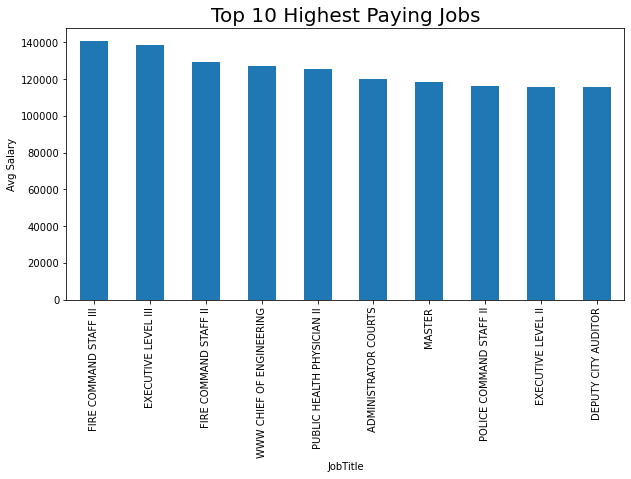

JobTitle
FIRE COMMAND STAFF III        140885.000000
EXECUTIVE LEVEL III           138400.000000
FIRE COMMAND STAFF II         129587.000000
WWW CHIEF OF ENGINEERING      127296.000000
PUBLIC HEALTH PHYSICIAN II    125300.000000
ADMINISTRATOR COURTS          120100.000000
MASTER                        118706.833333
POLICE COMMAND STAFF II       116514.571429
EXECUTIVE LEVEL II            115892.346341
DEPUTY CITY AUDITOR           115600.000000
Name: AnnualSalary, dtype: float64

In [30]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10)

<b>Number of Jobs whose average pay is more than total average salary</b>

In [31]:
mean_sal = salary_cpy.AnnualSalary.mean()
good_pay_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

798

- Out of 1073 Jobs, 798 Jobs pay more than total average Salary

<b>The top 10 Agencies and AgencyID with highest number of employees</b>

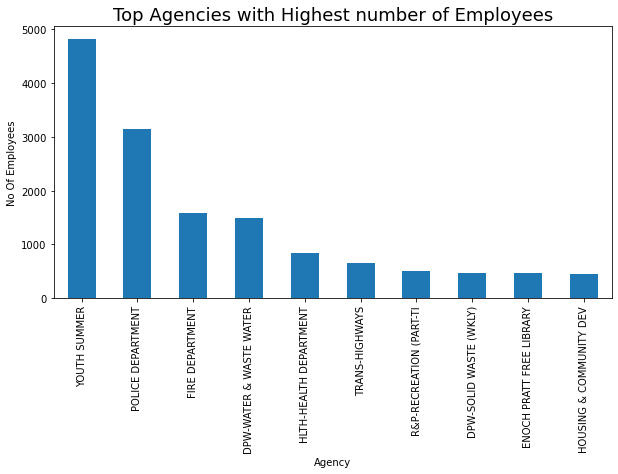

Agency
YOUTH SUMMER                4817
POLICE DEPARTMENT           3139
FIRE DEPARTMENT             1575
DPW-WATER & WASTE WATER     1491
HLTH-HEALTH DEPARTMENT       833
TRANS-HIGHWAYS               651
R&P-RECREATION (PART-TI      507
DPW-SOLID WASTE (WKLY)       475
ENOCH PRATT FREE LIBRARY     463
HOUSING & COMMUNITY DEV      446
Name: Name, dtype: int64

In [32]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10)

- The Youth Summer has maximum number of employees followed by Police Department

<b>Top 10 Jobs that has highest number of employees</b>

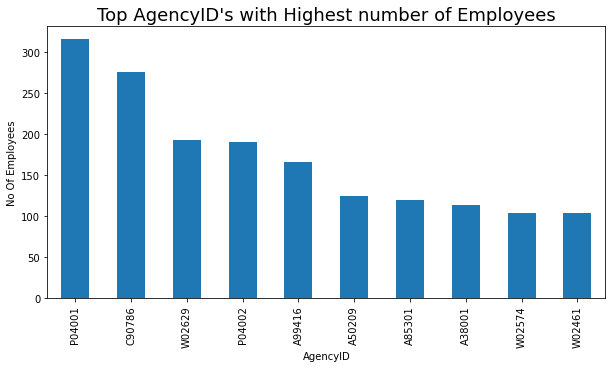

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
A50209    125
A85301    120
A38001    114
W02574    104
W02461    104
Name: Name, dtype: int64

In [33]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10)

- The P04001 has maximum number of employee.s followed by C90786.

<b>Salary relation with Hire Year</b>

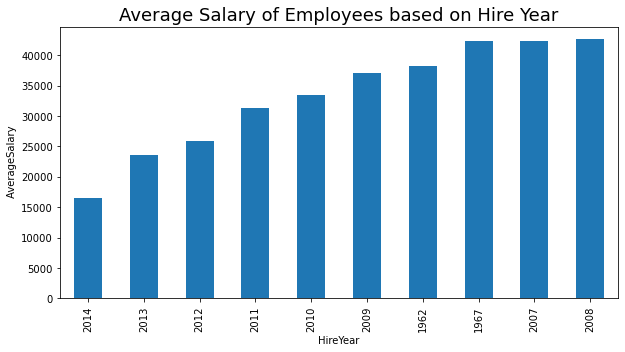

HireYear
2014    16493.347246
2013    23647.479241
2012    25972.636315
2011    31249.601869
2010    33536.680992
2009    37046.892919
1962    38195.000000
1967    42275.833333
2007    42291.821762
2008    42609.917668
Name: AnnualSalary, dtype: float64

In [34]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel(' AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10)

- It suggests that the Salary of the employees increases with experience in the company.

<b>Checking if Hiring Month has any such effect.</b>

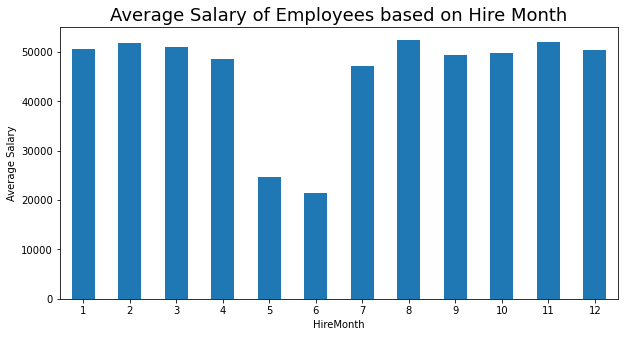

HireMonth
1     50625.991041
2     51862.053571
3     51109.773063
4     48674.680848
5     24679.977200
6     21485.964210
7     47199.461303
8     52472.517027
9     49460.529011
10    49900.300966
11    52098.092267
12    50441.871037
Name: AnnualSalary, dtype: float64

In [35]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.xticks(rotation=0)
plt.show()
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean()

<b>Now I am Checking in which Month most people are hired.</b>

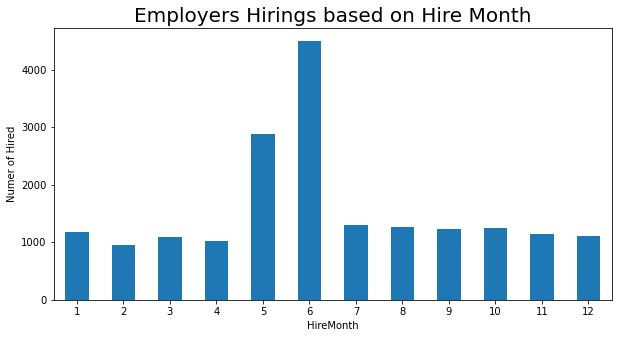

In [36]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Month",fontsize=20)
plt.xticks(rotation=0)
plt.show()

- More members are being hired in months of May and June but they have relatively lower average salaries.

<AxesSubplot:>

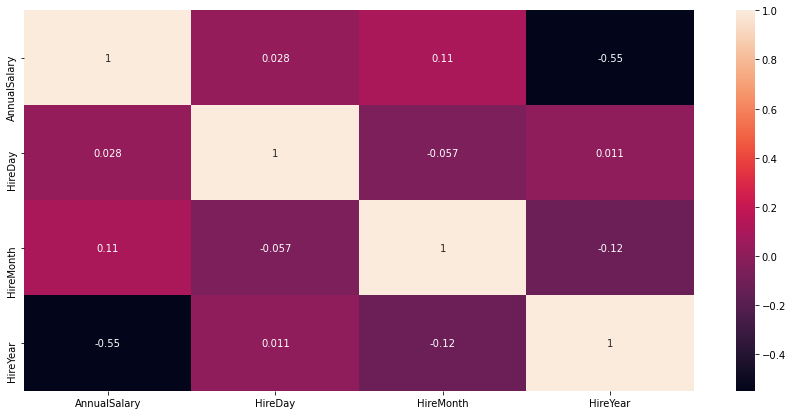

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(salary_cpy.corr(),annot=True)

- Except for HireYear nothing seems to have significant correlation with Annual Salary.

### Feature Engineering

In [38]:
salary_master = salary_cpy.copy()

In [39]:
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)
print(salary_master['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [40]:
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)
print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [41]:
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)
print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


In [42]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


- Since HireYear, HireMonth and HireDay is there , Date field is no longer required.
- Annual Income is never based on Name, so it is safe to remove both those columns.

In [43]:
salary_master = salary_master.drop(['HireDate','Name'],axis=1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


### Train Test Split

In [44]:
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=42)

In [45]:
print(salary_train.shape)
print(salary_test.shape)

(13226, 7)
(5669, 7)


#### Divide test set into Dependent and independent variables

In [46]:
y_train = salary_train.pop('AnnualSalary')
X_train = salary_train
y_test = salary_test.pop('AnnualSalary')
X_test = salary_test

### Scaling
>Standardizing independent features in a fixed range.

In [47]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,3.410750e-16,-2.445580e-16,-3.068769e-16,-1.107999e-16,-4.932039e-17,1.091302e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [48]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


### Model Building

In [50]:
lr = LinearRegression()
salary_reg = lr.fit(X_train,y_train)

In [51]:
salary_reg.score(X_train,y_train)

0.964833881870778

<b> Here I can see that I got a very high value for R-squared , which means the independent variables are able to expalin almost 96% of variance in the dependent variable. </b>

### Model Evaluation

In [52]:
salary_reg.score(X_test,y_test)

0.9634621082754347

<b> The model performs well on the test data as well giving an R-squared of 0.963. This model can be used for predicting the Salaries of Employees in Baltimore. </b>

### Plotting distribution plot to check whether Residuals satisfy assumptions of Linear Regression

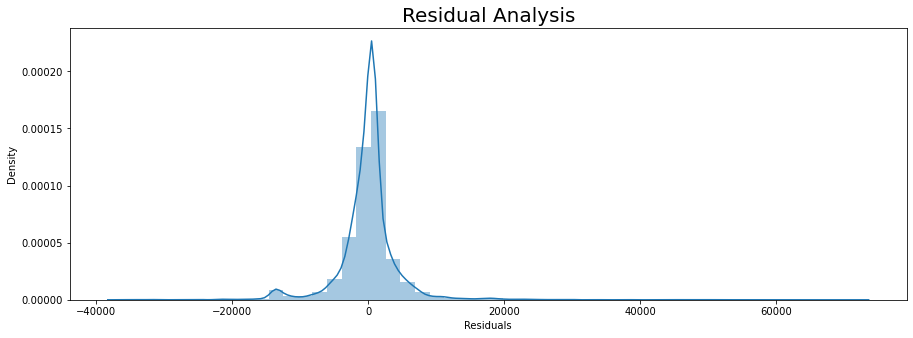

In [53]:
plt.figure(figsize=(15,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

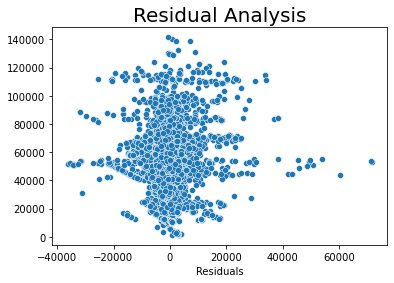

In [54]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

### Checking the coefficients and intercept 

In [55]:
print("Coef are:",salary_reg.coef_)
print("Intercept is",salary_reg.intercept_)

Coef are: [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
Intercept is 39628.221303493134


### Model Equation

In [56]:
model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print('Predicted Salary' + ' = ' + model)

Predicted Salary = 39628.221303493134 + 22395.653578510748 * JobTitle + 2798.6775282355807 * AgencyID + -1694.559936588217 * Agency + -22.591564342893353 * HireDay + -62.658730755574844 * HireMonth + -2049.2160125577852 * HireYear


<font color='Red' face='Cursive'><b>Predicted Salary </font> = <font color='Purple' face='comic sans ms'> <b>39628.221303493134 </b>+ 22395.653578510748 * <b>JobTitle</b> + 2798.6775282355807 * <b>AgencyID</b> + -1694.559936588217 * <b>Agency</b> + -22.591564342893353 * <b>HireDay</b> -62.658730755574844 * <b>HireMonth</b> + -2049.2160125577852 * <b>HireYear</b> </font>